In [1]:
import sys
sys.path.append('/home/decker/lab433')

from synoptic import get_gfs1deg, MODEL, display_grids
from datetime import datetime

import xarray as xr
import numpy as np

from metpy.units import units
from metpy.plots import ContourPlot, FilledContourPlot, BarbPlot, MapPanel, PanelContainer
import metpy.calc as mpcalc

In [2]:
init_time = datetime(2024, 9, 18, 6)
plot_time = datetime(2024, 9, 22, 6)
gfs = get_gfs1deg(init_time, plot_time)

ht500 = gfs['Geopotential_height_isobaric'].metpy.sel(vertical=500*units('hPa'))
u500 = gfs['u-component_of_wind_isobaric'].metpy.sel(vertical=500*units('hPa'))
v500 = gfs['v-component_of_wind_isobaric'].metpy.sel(vertical=500*units('hPa'))

wind_speed = mpcalc.wind_speed(u500, v500)

In [3]:
isohypses = ContourPlot()
isohypses.data = ht500
isohypses.time = plot_time
isohypses.contours = range(0, 11000, 6)
isohypses.linecolor = 'gold'
isohypses.linestyle = 'solid'
isohypses.clabels = True
isohypses.plot_units = 'dam'

fill = FilledContourPlot()
fill.data = wind_speed
fill.time = plot_time
fill.contours = np.arange(0, 50, 10).tolist()
fill.colormap = 'jet'
fill.colorbar = 'horizontal'

barbs = BarbPlot()
barbs.data = gfs
barbs.time = plot_time
barbs.field = ['u-component_of_wind_isobaric', 'v-component_of_wind_isobaric']
barbs.skip = (3, 3)
barbs.plot_units = 'knot'
barbs.level = 500 * units('hPa')

panel = MapPanel()
panel.area = [-130, -60, 22, 60]
panel.projection = 'mer'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'500-mb Heights and Wind Speed at {plot_time}'
panel.plots = [fill, isohypses, barbs]

/usr/local/python/3.8/envs/met_course/lib/python3.11/site-packages/cartopy/crs.py:538: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


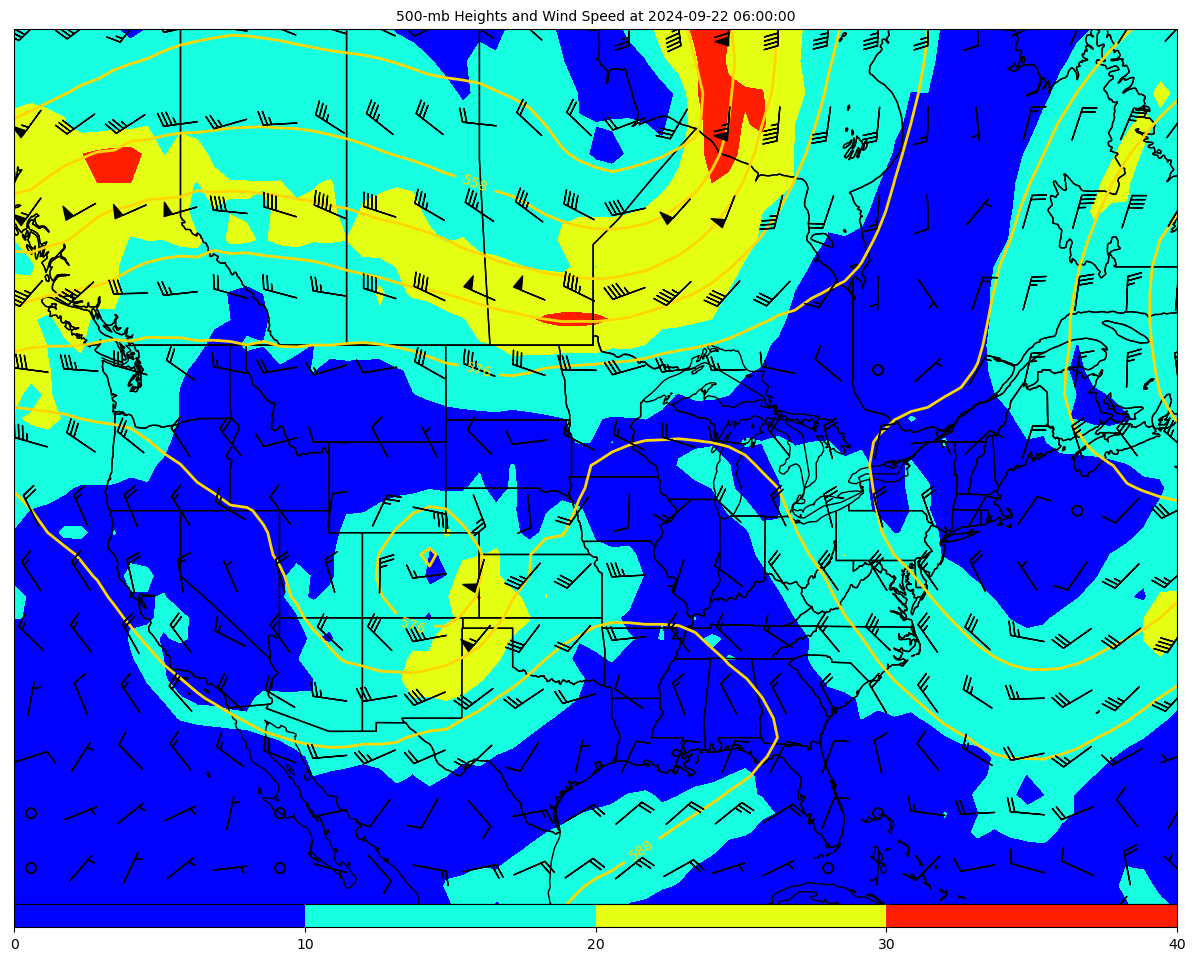

In [4]:
pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]
pc.show()
pc.save('lab3_p3.svg', bbox_inches='tight', dpi=300)